In [4]:
import requests
import pandas as pd
import pandas as pd
import numpy as np
import holidays
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Un for para crear lista de años
años = [año for año in range(2013, 2025)]  

dataframes = []

# La Api
base_url = 'https://api.boostr.cl/holidays'

# Iterar sobre cada año y obtener los feriados correspondientes
for año in años:
    url = f'{base_url}/{año}.json'
    response = requests.get(url)
    response.raise_for_status()  

    # Obtener datos en Json
    data = response.json()

    # Pasar datos a DF
    dff = pd.DataFrame(data)
    df_data = pd.json_normalize(dff['data'])
    
    # Añadir la data a dataframes
    dataframes.append(df_data)
    time.sleep(3) 
    
# Concatenamos y transformamos el DF
df_final = pd.concat(dataframes, ignore_index=True)
df_final['date'] = pd.to_datetime(df_final['date'], format='%Y-%m-%d')

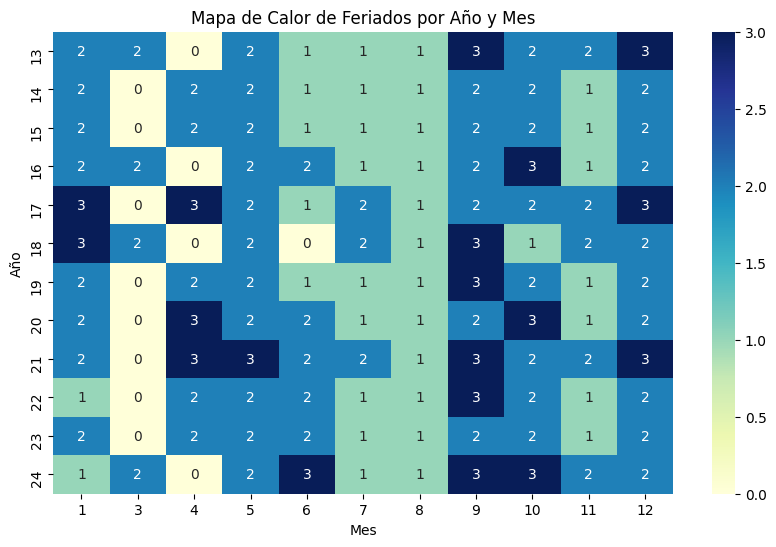

In [8]:
heatmap_data = df_final.pivot_table(
    index=df_final['date'].dt.year,
    columns=df_final['date'].dt.month,
    aggfunc='size',
    fill_value=0
)
heatmap_data.index = heatmap_data.index.to_series().apply(lambda x: str(x)[-2:])
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Mapa de Calor de Feriados por Año y Mes')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.show()
